# Poster figures

This notebook has the code to generate all the figures of the BCI society poster

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Butterworth filter response

C:\Users\danie\AppData\Local\Temp\ipykernel_18332\979097162.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.semilogx(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')


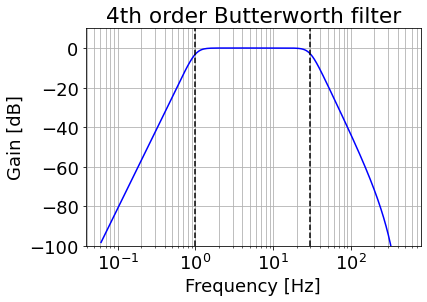

In [19]:
fs = 1000 # Sampling frequency
lowcut = 1 # Lower cutoff frequency
highcut = 30 # Upper cutoff frequency
order = 4 # Filter order

nyq = 0.5 * fs # Nyquist frequency
low = lowcut / nyq # Normalized lower cutoff frequency
high = highcut / nyq # Normalized upper cutoff frequency

sos = signal.butter(order, [low, high], btype='band', output="sos")

w, h = signal.sosfreqz(sos, worN=2**13)

plt.rcParams.update({'font.size': 18})  # Increase font size
fig, ax = plt.subplots(1, 1)
ax.semilogx(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
# ax.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Gain [dB]')
ax.set_title('4th order Butterworth filter')
ax.grid(which="both")
ax.axvline(lowcut, color='k', linestyle="--")
ax.axvline(highcut, color='k', linestyle="--")

ax.set_ylim([-100, 10])
plt.show()

## Artifact removal tool 

Eye movement artifact

AttributeError: 'AxesSubplot' object has no attribute 'box'

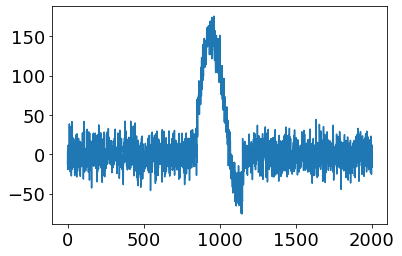

In [82]:
# Generate random signal
signal_length = 2000 
signal = np.random.randn(signal_length)

# Amplify signal
amplified_signal = 15 * signal

# Add eye movement artifact
start_artifact = 850
artifact_length = 300
artifact = 50 + 100 * np.sin(2 * np.pi * 0.8 * np.arange(artifact_length) / artifact_length)
signal_with_artifact = amplified_signal
signal_with_artifact[start_artifact:start_artifact+artifact_length] += artifact

# Plot signal with artifact
[fig, ax] = plt.subplots()
ax.plot(signal_with_artifact)
# plt.plot(signal_with_artifact)
ax.box()
ax.set_xticklabels("")
ax.set_yticklabels("")


plt.show()

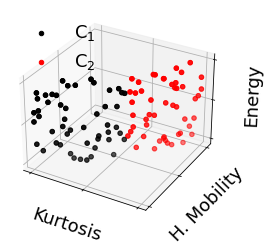

In [60]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the data
nsamples = 100
kurtosis = np.sort(np.random.random(nsamples))
mobility = np.sort(np.random.random(nsamples))
energy = np.random.random(nsamples)

colors = ["black", "red"]
colors_list = [None] * nsamples
mask = [None] * nsamples
for i in range(nsamples):
    if (i < nsamples // 2):
        colors_list[i] = colors[0]
        mask[i] = True
    else:
        colors_list[i] = colors[1]
        mask[i] = False
inverted_mask = [not x for x in mask]
# colors_list = np.ones(nsamples)
# colors_list[:len(colors_list)//2] = colors[0]
# colors_list[len(colors_list)//2:] = colors[1]

# Define classes

# colors = ['black', 'red', 'black', 'red', 'black']

# Plot the data
ax.scatter(kurtosis, mobility, energy, c=colors_list)
ax.scatter(kurtosis[mask], mobility[mask], energy[mask], c=colors[0], label="C$_1$")
ax.scatter(kurtosis[inverted_mask], mobility[inverted_mask], energy[inverted_mask], c=colors[1], label="C$_2$")

# Set the labels
ax.set_xlabel('Kurtosis')
ax.set_ylabel('H. Mobility')
ax.set_zlabel('Energy')
ax.set_xticklabels("")
ax.set_yticklabels("")
ax.set_zticklabels("")
ax.legend(frameon=False)
# ax.legend(["C$_1$", "C$_2$"])

plt.show()